In [21]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Definición de métodos, es decir, técnicas y algoritmos que se usarán para entrenar, ajustar y aplicar el modelo en paetes específicas.  


La función plot_grid toma como entrada los siguientes parámetros:

X: una matriz que representa las imágenes que se van a mostrar en la cuadrícula.
y: una matriz que contiene las etiquetas correspondientes a las imágenes en X.
grid_size: un entero que representa el tamaño de la cuadrícula (por ejemplo, si grid_size = 3, se mostrará una cuadrícula de 3x3 imágenes).
labelNames: una lista que contiene los nombres de las etiquetas correspondientes a las clases representadas en X.
A continuación, se explican los pasos de la función plot_grid:

Se crea una figura y una matriz de subtramas utilizando plt.subplots(grid_size, grid_size, figsize=(8, 10)). Esto crea una cuadrícula de subtramas de tamaño grid_size x grid_size que se utilizarán para mostrar las imágenes.
Se realiza un bucle doble utilizando for para iterar sobre todas las filas y columnas de la cuadrícula. Los bucles tienen rangos range(grid_size).
En cada iteración del bucle, se calcula el índice correspondiente en la matriz X utilizando la fórmula index = i * grid_size + j.
Se muestra la imagen correspondiente al índice calculado en la subtrama actual utilizando axes[i, j].imshow(X[index], cmap='gray'). La imagen se muestra en escala de grises.
Se elimina el eje de coordenadas en la subtrama actual utilizando axes[i, j].axis('off').
Se agrega un título a la subtrama actual utilizando axes[i, j].set_title(f'Label: {labelNames[y[index][0]]}'). El título muestra la etiqueta correspondiente a la imagen actual.
Después de que se completan los bucles, se muestra el gráfico utilizando plt.show().
En resumen, la función plot_grid crea una cuadrícula de imágenes y sus etiquetas correspondientes utilizando los parámetros de entrada. Cada imagen se muestra en una subtrama de la cuadrícula, junto con su etiqueta.

In [52]:



def plot_grid(X, y, grid_size, labelNames):
    # Crear una figura y un conjunto de ejes subyacentes
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    
    for i in range(grid_size):
        for j in range(grid_size):
            # Calcular el índice correspondiente al nuevo grid
            index = (i * grid_size) + j
            
            # Obtener la imagen y la etiqueta asociada
            image = X[index]
            label = y[index]
            
            # Mostrar la imagen en los ejes correspondientes
            axes[i, j].imshow(image, cmap='gray')
            axes[i, j].axis('off')
            
            # Agregar un título con la etiqueta correspondiente
            axes[i, j].set_title(f'Label: {labelNames[label]}')
    
    # Mostrar el plot
    plt.show()



In [53]:
def print_metrics(predictions, X_test, y_test, labelNames, H, epochs):

    print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=labelNames))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()


In [54]:
# Cargar el dataset con la función load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [55]:
#Imprimir algunas estadísticas del dataset 
#En el .shape se mostrará el tamaño de las imágenes que se usará más adelante 
print("Tamaño de X_train: ", x_train.shape[0])
print("Tamaño de X_test: ", x_test.shape[0])
print("Tamaño total del dataset: ", x_train.shape[0] + x_test.shape[0])
print("Porcentaje de datos de entrenamiento: ", x_train.shape[0] / (x_train.shape[0] + x_test.shape[0]))
print("Porcentaje de datos de test: ", x_test.shape[0] / (x_train.shape[0] + x_test.shape[0]))
print("Número de clases:", len(set(y_train)))

Tamaño de X_train:  60000
Tamaño de X_test:  10000
Tamaño total del dataset:  70000
Porcentaje de datos de entrenamiento:  0.8571428571428571
Porcentaje de datos de test:  0.14285714285714285
Número de clases: 10


In [56]:
# Obtenemos los nombres de las clases de la base de datos
labelNames = ["cero", "uno", "dos", "tres", "cuatro","cinco", "seis", "siete", "ocho", "nueve"]

print("Número de clases en el dataset: ", len(labelNames))

Número de clases en el dataset:  10


In [58]:
# Contar el numero de casos diferentes en una lista
unique, counts = np.unique(y_train, return_counts=True)
print("Numero de casos y su distribucion en el dataset de entrenamiento: ", dict(zip(unique, counts)))

Numero de casos y su distribucion en el dataset de entrenamiento:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


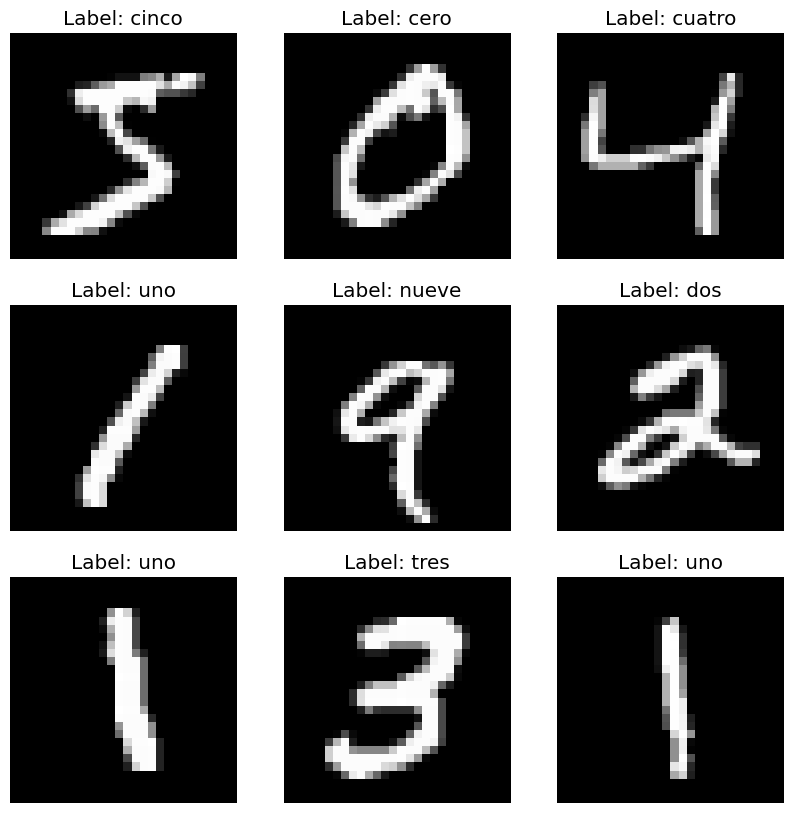

In [66]:
#Vista general de las imagenes del datset 
plot_grid(x_train, y_train, 3 ,labelNames)

# Preparación de los datos de entrada 

In [67]:
# Normalizamos los valores de la imagenes entre 0 y 1, es decir, que estén en la misma escala 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [74]:
print("Tamaño de la imagen", x_train[0].shape)


Tamaño de la imagen (28, 28)


Como el dataset ha demostrado tener un tamaño de (28,28) signific qeu es BIDIMENSIONAL, por lo que a continuación se calculará el tamaño de vector de imagen multiplicando las dos dimensiones

In [75]:
print("Tamaño del vector de la imagen", x_train[0].shape[0] * x_train[0].shape[1])
print("Tamaño del vector de la imagen", x_train[0].flatten().shape[0])

Tamaño del vector de la imagen 784
Tamaño del vector de la imagen 784


In [80]:
# Convertimos las imagenes (matrices) en vectores planos de 3072 elementos
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

Utilizando la practics de one hot encoding se hara el indice y su contenido binario para que a la hora demostrar su contenido no sea de manera arbitraria 

In [81]:
# Binariamos las etiquetas (one-hot encoding), conviertiendolas de un valor numerico a un vector de 10 elementos
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
print(f"Nueva estructura de las etiquetas -> {y_test[0]}")

Nueva estructura de las etiquetas -> [0 0 0 0 0 0 0 1 0 0]


# Creación del modelo neuronal 

In [82]:
# Se crea una capa de modelosecuencial 
model = Sequential()
# Se agrega uan capa densa de 784 unidades que son las que salieron en el vector en el codigo anterior y se activa con RELU, que aplica una funcion lineal a los valores positivos y convierte en 0 los valores negativos
model.add(Dense(784, input_shape=(784,), activation="relu"))
#Se agrega una capa densa de de 512 unidades (aleatorio) y se activa RELU de nuevo 
model.add(Dense(512, activation="relu"))
# Se agraga otra capa donde saldrán 10 datos equivalentes a los tipos de clase y se utiliza softmax que es normalización de los valores de salida 
model.add(Dense(10, activation="softmax"))

# Entrenamiento del modelo

In [83]:
#Conjunto de entrenamiento (x_train, y_train) vs conjunto de prueba (x_test, y_test)
sgd = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
# El historial del entrenamiento se guarda en la variable H y se hace 50 periodos o iteraciones de prueba
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
 	epochs=50, batch_size=150)

Epoch 1/50
400/400 [==============================] - 32s 69ms/step - loss: 1.1497 - accuracy: 0.7541 - val_loss: 0.5530 - val_accuracy: 0.8703
Epoch 2/50
400/400 [==============================] - 28s 70ms/step - loss: 0.4707 - accuracy: 0.8810 - val_loss: 0.3845 - val_accuracy: 0.8999
Epoch 3/50
400/400 [==============================] - 27s 68ms/step - loss: 0.3723 - accuracy: 0.8986 - val_loss: 0.3306 - val_accuracy: 0.9084
Epoch 4/50
400/400 [==============================] - 29s 72ms/step - loss: 0.3293 - accuracy: 0.9075 - val_loss: 0.3009 - val_accuracy: 0.9166
Epoch 5/50
400/400 [==============================] - 29s 73ms/step - loss: 0.3023 - accuracy: 0.9151 - val_loss: 0.2784 - val_accuracy: 0.9233
Epoch 6/50
400/400 [==============================] - 30s 74ms/step - loss: 0.2822 - accuracy: 0.9200 - val_loss: 0.2636 - val_accuracy: 0.9282
Epoch 7/50
400/400 [==============================] - 29s 71ms/step - loss: 0.2662 - accuracy: 0.9252 - val_loss: 0.2489 - val_accuracy:

El accuracy es de un 97 por ciento, por lo que se puede decir, en primeras vistas, que el modelo funciona de manera optima y tiene un 
corto margen de error con uan pérrida de data de 0.07

# En el primer bloque de codigo se visualizará una imagen random del dataset y en el segundo bloque se verificará si el modelo puede predecir esa imagen, si lo hace, significa que el modelo es óptimo y funciona bien 

Text(0.5, 1.0, 'cuatro')

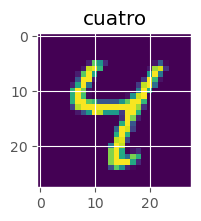

In [100]:
# Visualizamos la imagen antes de la clasificacion
index = 6
plt.figure(figsize=(2,2))
plt.imshow(x_test[index].reshape(28, 28))
plt.title(labelNames[y_test[index].argmax(axis=0)])

In [101]:
# Pasamos la imagen al modelo para obtener la prediccion
prediction = model.predict(x_test[index].reshape(1, 784))
prediction.argmax(axis=1)

print("Clase predicha para la imagen", labelNames[prediction.argmax(axis=1)[0]])

1/1 [==============================] - 0s 64ms/step
Clase predicha para la imagen cuatro


# Predicciones

In [99]:
predictions = model.predict(x_test, batch_size=150)

print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=labelNames))

67/67 [==============================] - 2s 30ms/step
              precision    recall  f1-score   support

        cero       0.97      0.98      0.98       980
         uno       0.98      0.99      0.99      1135
         dos       0.97      0.98      0.97      1032
        tres       0.96      0.98      0.97      1010
      cuatro       0.97      0.97      0.97       982
       cinco       0.97      0.96      0.96       892
        seis       0.97      0.97      0.97       958
       siete       0.97      0.96      0.97      1028
        ocho       0.97      0.96      0.97       974
       nueve       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



              precision    recall  f1-score   support

        cero       0.97      0.98      0.98       980
         uno       0.98      0.99      0.99      1135
         dos       0.97      0.98      0.97      1032
        tres       0.96      0.98      0.97      1010
      cuatro       0.97      0.97      0.97       982
       cinco       0.97      0.96      0.96       892
        seis       0.97      0.97      0.97       958
       siete       0.97      0.96      0.97      1028
        ocho       0.97      0.96      0.97       974
       nueve       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



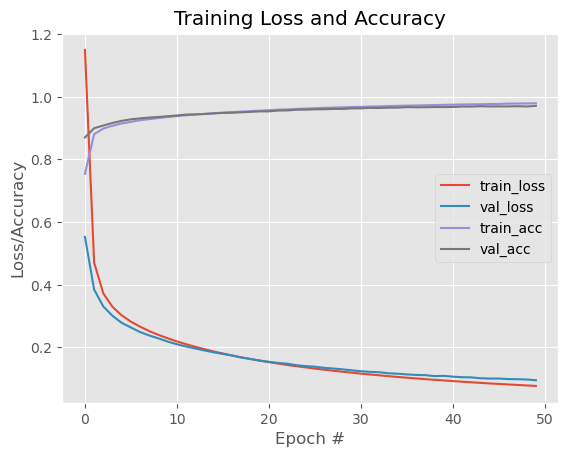

In [102]:
print_metrics(predictions, x_test, y_test, labelNames, H, 50)

ANÁLISIS: 

El análisis de las métricas del modelo de entrenamiento de la red neuronal es el siguiente:

Precision: La precisión es una medida de la exactitud del modelo en predecir correctamente las instancias positivas (números escritos a mano) de cada clase. En promedio, el modelo tiene una precisión del 97%, lo que indica que acierta en un alto porcentaje de casos.

Recall: El recall, también conocido como sensibilidad, es una medida de la capacidad del modelo para encontrar todas las instancias positivas de cada clase. En promedio, el modelo tiene un recall del 97%, lo que significa que identifica correctamente la mayoría de los números escritos a mano.

F1-score: El F1-score es una medida que combina la precisión y el recall, y proporciona una medida de equilibrio entre ambas. En promedio, el modelo tiene un F1-score de 97%, lo que indica un buen balance entre la precisión y el recall.

Support: Indica el número de instancias de cada clase en el conjunto de prueba. Por ejemplo, hay 980 instancias de la clase "cero", 1135 instancias de la clase "uno", etc.

Accuracy: La precisión global del modelo en todo el conjunto de prueba es del 97%, lo que significa que el modelo clasifica correctamente el 97% de las instancias de números escritos a mano.

En resumen, el modelo de entrenamiento de la red neuronal muestra un rendimiento muy bueno en la clasificación de números escritos a mano, con una alta precisión, recall y F1-score en todas las clases. Además, la precisión global del modelo es del 97%.